In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

LacI ---| TetR,

TetR ---| Alpha Cl,

Alpha Cl ---| LacI

In [59]:
repressilator = gs.ReactionModel(
                                species = {
                                                'tetR': 0,
                                                'lacI': 0,
                                                'alphacl': 0,
                                                'GFP': 0,

                                                'tetR_mRNA': 0,
                                                'lacI_mRNA': 0, 
                                                'alphacl_mRNA': 0,
                                                'GFP_mRNA': 0,
                                                
                                                'complex_tetR': 0,
                                                'complex_lacI': 0,
                                                'complex_alphacl': 0,
                                                'complex_GFP': 0,

                                                'promoter_tetR': 1,
                                                'promoter_lacI': 1,
                                                'promoter_alphacl': 1,
                                                'promoter_GFP': 1
                                                },

                                propensities = {
                                                'kc_tetR': 10.02,
                                                'kc_lacI': 10.02,
                                                'kc_alphacl': 10.02,
                                                'kc_GFP': 10.02,

                                                'kd_tetR': np.log(2)/10,
                                                'kd_lacI': np.log(2)/10,
                                                'kd_alphacl': np.log(2)/10,
                                                'kd_GFP': np.log(2)/10,

                                                'ka_c_tetR': 0.95,
                                                'ka_c_lacI': 0.95,
                                                'ka_c_alphacl': 0.95,
                                                'ka_c_GFP': 0.95,

                                                'kd_c_tetR': 0.267,
                                                'kd_c_lacI': 0.267,
                                                'kd_c_alphacl': 0.267,
                                                'kd_c_GFP': 0.267,

                                                'kc_mRNA_tetR': 2,
                                                'kc_mRNA_lacI': 2,
                                                'kc_mRNA_alphacl': 2,
                                                'kc_mRNA_GFP': 2,

                                                'kd_mRNA_tetR': np.log(2)/2.5,
                                                'kd_mRNA_lacI': np.log(2)/2.5,
                                                'kd_mRNA_alphacl': np.log(2)/2.5,
                                                'kd_mRNA_GFP': np.log(2)/2.5
                                                },


                                reactions = {
                                                'PctetR':       ['kc_tetR', 'tetR_mRNA'],
                                                'PclacI':       ['kc_lacI', 'lacI_mRNA'],
                                                'Pcalphacl':    ['kc_alphacl', 'alphacl_mRNA'],
                                                'GFP_cre' :     ['kc_GFP', 'GFP_mRNA'],

                                                'PdtetR':       ['kd_tetR', 'tetR'],
                                                'PdlacI':       ['kd_lacI', 'lacI'],
                                                'Pdalphacl':    ['kd_alphacl', 'alphacl'],                                               
                                                'GFP_des':      ['kd_GFP', 'GFP'],

                                                'Ac_tetR':      ['ka_c_tetR', 'lacI', 'promoter_tetR'],
                                                'Ac_lacI':      ['ka_c_lacI', 'alphacl', 'promoter_lacI'],
                                                'Ac_alphacl':   ['ka_c_alphacl', 'tetR', 'promoter_alphacl'],
                                                'Ac_GFP':       ['ka_c_GFP', 'tetR', 'promoter_GFP'],

                                                'Dc_tetR':      ['kd_c_tetR', 'complex_tetR'],
                                                'Dc_lacI':      ['kd_c_lacI', 'complex_lacI'],
                                                'Dc_alphacl':   ['kd_c_alphacl', 'complex_alphacl'],
                                                'Dc_GFP' :      ['kd_c_GFP', 'complex_GFP'],

                                                'Tr_mRNA_tetR':         ['kc_mRNA_tetR', 'promoter_tetR'],
                                                'Tr_mRNA_lacI':         ['kc_mRNA_lacI', 'promoter_lacI'],
                                                'Tr_mRNA_alphacl':      ['kc_mRNA_alphacl', 'promoter_alphacl'],
                                                'Tr_mRNA_GFP':          ['kc_mRNA_GFP', 'promoter_GFP'],
                
                                                'Dc_mRNA_tetR':         ['kd_mRNA_tetR', 'tetR_mRNA'],
                                                'Dc_mRNA_lacI':         ['kd_mRNA_lacI', 'lacI_mRNA'],
                                                'Dc_mRNA_alphacl':      ['kd_mRNA_alphacl', 'alphacl_mRNA'],
                                                'Dc_mRNA_GFP':          ['kd_mRNA_GFP', 'GFP_mRNA']
                                                },
                                
                                q = {   'PctetR':       {'create': ['tetR']},
                                        'PclacI':       {'create': ['lacI']},
                                        'Pcalphacl':    {'create': ['alphacl']},
                                        'GFP_cre':      {'create': ['GFP']},

                                        'PdtetR':       {'destroy': ['tetR']},
                                        'PdlacI':       {'destroy': ['lacI']},
                                        'Pdalphacl':    {'destroy': ['alphacl']},           
                                        'GFP_des':      {'destroy': ['GFP']},

                                        'Ac_tetR' :     {'create': ['complex_tetR'],    'destroy': ['lacI', 'promoter_tetR']},
                                        'Ac_lacI' :     {'create': ['complex_lacI'],    'destroy': ['alphacl', 'promoter_lacI']},
                                        'Ac_alphacl' :  {'create': ['complex_alphacl'], 'destroy': ['tetR', 'promoter_alphacl']},
                                        'Ac_GFP':       {'create': ['complex_GFP'],     'destroy': ['tetR', 'promoter_GFP']},

                                        'Dc_tetR' :     {'create': ['lacI','promoter_tetR'],   'destroy': ['complex_tetR']},
                                        'Dc_lacI' :     {'create': ['alphacl','promoter_lacI'],'destroy': ['complex_lacI']},
                                        'Dc_alphacl' :  {'create': ['tetR', 'promoter_alphacl'],'destroy': ['complex_alphacl']},
                                        'Dc_GFP' :      {'create': ['tetR', 'promoter_GFP'],    'destroy': ['complex_GFP']},

                                        'Tr_mRNA_tetR' :        {'create': ['tetR_mRNA']},
                                        'Tr_mRNA_lacI' :        {'create': ['lacI_mRNA']},
                                        'Tr_mRNA_alphacl' :     {'create': ['alphacl_mRNA']},
                                        'Tr_mRNA_GFP' :         {'create': ['GFP_mRNA']},

                                        'Dc_mRNA_tetR' :        {'destroy': ['tetR_mRNA']},
                                        'Dc_mRNA_lacI' :        {'destroy': ['lacI_mRNA']},
                                        'Dc_mRNA_alphacl' :     {'destroy': ['alphacl_mRNA']},
                                        'Dc_mRNA_GFP' :         {'destroy': ['GFP_mRNA']}}
                                )

In [60]:
simulation = gs.Gillespie(tmax=600, sampling_time= 1, reaction_model=repressilator, model_name='repressilator', cells=1)
simulation.simulate()


100%|██████████| 1/1 [00:07<00:00,  7.02s/it]


In [56]:
df = pd.read_csv('repressilator.csv', delimiter='|')

(0.0, 600.0)

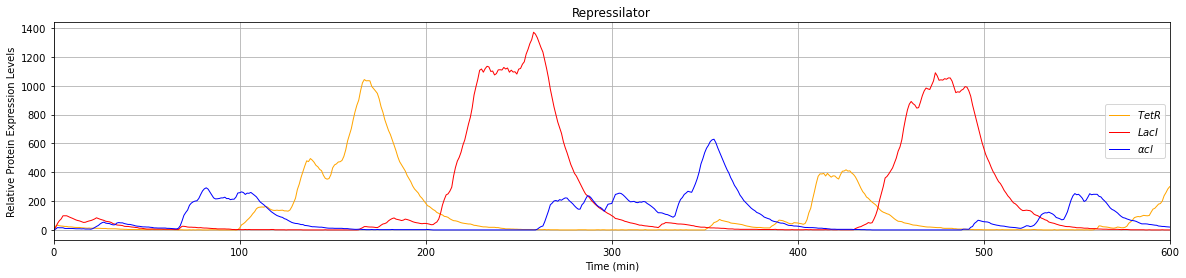

In [58]:
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(df.time[df.cell==1], df.tetR[df.cell==1], '-', color='orange', lw=1, label= r'$TetR$')
ax.plot(df.time[df.cell==1], df.lacI[df.cell==1], '-', color='red', lw=1, label= r'$LacI$')
ax.plot(df.time[df.cell==1], df.alphacl[df.cell==1], '-', color='blue', lw=1, label= r'$\alpha cl$')

fig.set_size_inches(20, 4)

ax.set_title('Repressilator')

ax.set_xlabel('Time (min)')
ax.set_ylabel('Relative Protein Expression Levels')
ax.legend(loc=5)

ax.set_xlim(0,600)

Text(0, 0.5, 'GFP')

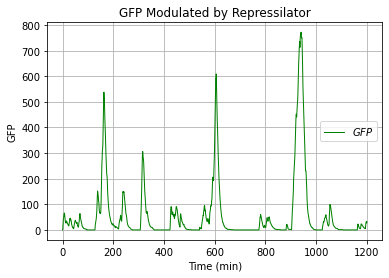

In [44]:
cells = df.cell.unique()
lw = 1
alpha_fig = 0.8
# for cell in cells:
#     plt.plot(df.time[df.cell==cell], df.GFP[df.cell==cell], '-g', lw=lw, alpha=alpha_fig)
plt.grid(True)
plt.plot(df.time[df.cell==1], df.GFP[df.cell==1], '-g', lw=lw, label= r'$GFP$')
plt.legend(loc=5)
plt.title('GFP Modulated by Repressilator')
plt.xlabel('Time (min)')
plt.ylabel('GFP')
# plt.yscale('log')
# plt.xlim([0,500])

In [ ]:
repressilator_division = gs.ReactionModel(
                                species = {
                                                'tetR': 0,
                                                'lacI': 0,
                                                'alphacl': 0,
                                                'GFP': 0,

                                                'tetR_promoter': 1,
                                                'lacI_promoter': 1,
                                                'alphacl_promoter': 1,
                                                'GFP_promoter': 1 
                                                },

                                propensities = {
                                                'kc_tetR': 5,
                                                'kc_lacI': 5,
                                                'kc_alphacl': 5,
                                                'kc_GFP': 5,

                                                'kd_tetR': np.log(2)/60,
                                                'kd_lacI': np.log(2)/60,
                                                'kd_alphacl': np.log(2)/60,
                                                'kd_GFP': np.log(2)/60,
                                                
                                                'kd_tetR_lacI': round(np.log(2)/11.84, 4),
                                                'kd_lacI_alphacl': round(np.log(2)/11.84, 4),
                                                # 'kd_lacI_alphacl': 0.0585,
                                                'kd_alphacl_tetR': round(np.log(2)/11.84, 4),
                                                'kd_GFP_tetR': round(np.log(2)/11.84, 4)
                                                },
                                
                                reactions = {

                                                'pc_tetR':      ['kc_tetR'],
                                                'pc_lacI':      ['kc_lacI'],
                                                'pc_alphacl':   ['kc_alphacl'],
                                                'GFP_cre' :     ['kc_GFP'],
                                                

                                                'PdtetR':       ['kd_tetR', 'tetR'],
                                                'PdlacI':       ['kd_lacI', 'lacI'],
                                                'Pdalphacl':    ['kd_alphacl', 'alphacl'],
                                                'GFP_deg':      ['kd_GFP', 'GFP'],
                                                
                                                'tetR_deg_lacI' :       ['kd_tetR_lacI', 'lacI'],
                                                'lacI_deg_alphacl' :    ['kd_lacI_alphacl', 'alphacl'],
                                                'alphacl_deg_tetR' :    ['kd_alphacl_tetR', 'tetR'],
                                                'GFP_deg_tetR':         ['kd_GFP_tetR', 'tetR']
                                                },
                                
                                q = {
                                        'pc_tetR':      {'create' : ['tetR']},
                                        'pc_lacI':      {'create' : ['lacI']},
                                        'pc_alphacl':   {'create' : ['alphacl']},
                                        'GFP_cre':      {'create' : ['GFP']},

                                        'PdtetR':       {'destroy': ['tetR']},
                                        'PdlacI':       {'destroy': ['lacI']},
                                        'Pdalphacl':    {'destroy': ['alphacl']},
                                        'GFP_deg':      {'destroy': ['GFP']},

                                        'tetR_deg_lacI'    : {'destroy': ['tetR']},
                                        'lacI_deg_alphacl' : {'destroy': ['lacI']},
                                        'alphacl_deg_tetR' : {'destroy': ['alphacl']},
                                        'GFP_deg_tetR'     : {'destroy': ['GFP']}
                                        }
                                )

In [62]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

repressilator_division = gs.ReactionModel(
                                species = {
                                                'tetR': 0,
                                                'lacI': 0,
                                                'alphacl': 0,
                                                'GFP': 0,

                                                # 'tetR_promoter': 1,
                                                # 'lacI_promoter': 1,
                                                # 'alphacl_promoter': 1,
                                                # 'GFP_promoter': 1 
                                                },

                                propensities = {
                                                'kc_tetR': 2,
                                                'kc_lacI': 2,
                                                'kc_alphacl': 2,
                                                'kc_GFP': 2,

                                                'kd_tetR': np.log(2)/60,
                                                'kd_lacI': np.log(2)/60,
                                                'kd_alphacl': np.log(2)/60,
                                                'kd_GFP': np.log(2)/60,
                                                
                                                'kd_tetR_lacI': round(np.log(2)/11.84, 4),
                                                'kd_lacI_alphacl': round(np.log(2)/11.84, 4),
                                                # 'kd_lacI_alphacl': 0.0585,
                                                'kd_alphacl_tetR': round(np.log(2)/11.84, 4),
                                                'kd_GFP_tetR': round(np.log(2)/11.84, 4)
                                                },
                                
                                reactions = {

                                                'pc_tetR':      ['kc_tetR'],
                                                'pc_lacI':      ['kc_lacI'],
                                                'pc_alphacl':   ['kc_alphacl'],
                                                'GFP_cre' :     ['kc_GFP'],
                                                

                                                'PdtetR':       ['kd_tetR', 'tetR'],
                                                'PdlacI':       ['kd_lacI', 'lacI'],
                                                'Pdalphacl':    ['kd_alphacl', 'alphacl'],
                                                'GFP_deg':      ['kd_GFP', 'GFP'],
                                                
                                                'tetR_deg_lacI' :       ['kd_tetR_lacI', 'lacI'],
                                                'lacI_deg_alphacl' :    ['kd_lacI_alphacl', 'alphacl'],
                                                'alphacl_deg_tetR' :    ['kd_alphacl_tetR', 'tetR'],
                                                'GFP_deg_tetR':         ['kd_GFP_tetR', 'tetR']
                                                },
                                
                                q = {
                                        'pc_tetR':      {'burst' : ['tetR']},
                                        'pc_lacI':      {'burst' : ['lacI']},
                                        'pc_alphacl':   {'burst' : ['alphacl']},
                                        'GFP_cre':      {'burst' : ['GFP']},

                                        'PdtetR':       {'burst_degradation': ['tetR']},
                                        'PdlacI':       {'burst_degradation': ['lacI']},
                                        'Pdalphacl':    {'burst_degradation': ['alphacl']},
                                        'GFP_deg':      {'burst_degradation': ['GFP']},

                                        'tetR_deg_lacI'    : {'destroy': ['tetR']},
                                        'lacI_deg_alphacl' : {'destroy': ['lacI']},
                                        'alphacl_deg_tetR' : {'destroy': ['alphacl']},
                                        'GFP_deg_tetR'     : {'destroy': ['GFP']}
                                        }
                                )
tmax = 600
simulation_2 = gs.Gillespie(tmax=tmax, sampling_time= 3, reaction_model=repressilator_division, model_name='represilator_division_adder', cells=1, division_time=18)

# simulation_2.simulate_division(model='adder')
simulation_2.simulate()


100%|██████████| 1/1 [00:11<00:00, 11.57s/it]


In [63]:
df_2 = pd.read_csv('represilator_division_adder.csv', delimiter='|')
df_2.head()

,tetR,lacI,alphacl,GFP,time,cell
0,0,0,0,0,0,1
1,77,177,58,98,3,1
2,119,213,159,236,6,1
3,210,260,271,238,9,1
4,259,306,265,239,12,1


No handles with labels found to put in legend.


(0.0, 1391.25)

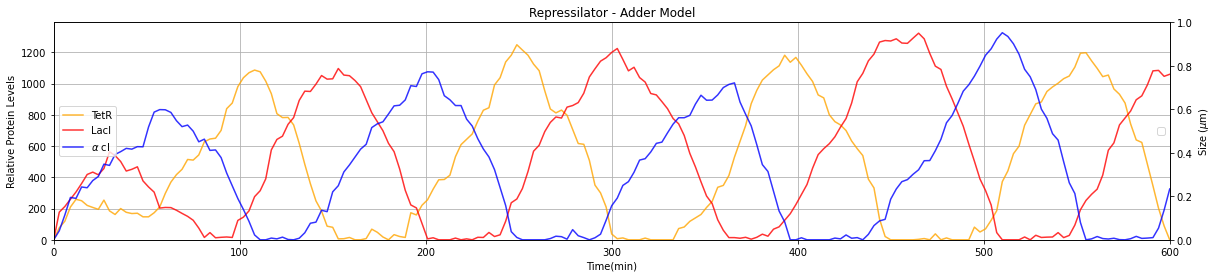

In [64]:


fig1, ax1 = plt.subplots()

ax2 = ax1.twinx()
time = df_2.time
ax1.plot(time,df_2.tetR ,'-', color = 'orange' ,alpha=0.8, ms=0.5, label='TetR')
ax1.plot(time,df_2.lacI ,'r-', alpha=0.8, ms=0.5, label='LacI')
ax1.plot(time,df_2.alphacl ,'b-', alpha=0.8, ms=0.5, label=r'${\alpha}$ cl')
# ax2.plot(time,df_2.cell_size, '--',color='black', linewidth=1.5, label='size', alpha=0.2)

fig1.set_size_inches(20, 4)

ax1.set_xlabel('Time(min)')
ax2.set_ylabel(r'Size (${\mu}$m)')
ax1.set_ylabel('Relative Protein Levels')
plt.title('Repressilator - Adder Model')
ax1.grid()
plt.legend(loc=5)
ax1.legend(loc=6)
ax1.set_xlim(0, tmax)
ax1.set_ylim(0)

No handles with labels found to put in legend.


(0.0, 1278.9)

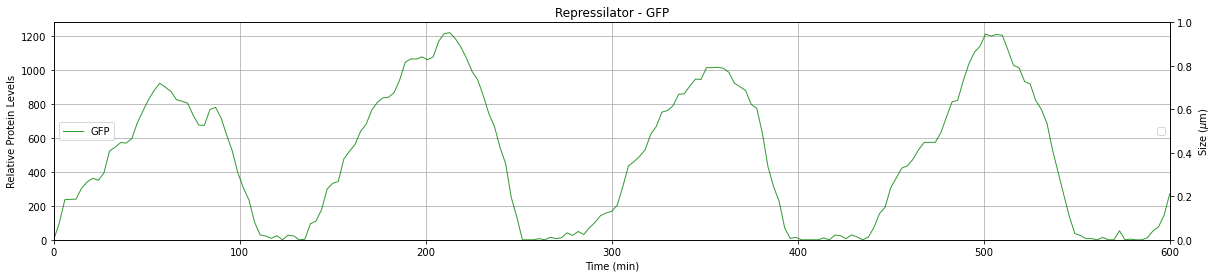

In [65]:
fig2, ax3 = plt.subplots()

ax4 = ax3.twinx()
fig2.set_size_inches(20, 4)

# ax4.plot(time, df_2.cell_size, '--',color='black', linewidth = 1.5, label='size', alpha = 0.2)
ax3.plot(time, df_2.GFP,'g-', alpha=0.8, linewidth=1, ms = 0.5, label = 'GFP')


ax4.set_ylabel(r'Size (${\mu}$m)')
ax3.set_ylabel('Relative Protein Levels')
plt.title('Repressilator - GFP')

ax3.set_xlabel('Time (min)')

ax3.grid()
plt.legend(loc=5)
ax3.legend(loc=6)
ax3.set_xlim(0, tmax)
ax3.set_ylim(0)

In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
df_3 = pd.read_csv('DatosCesar.csv')
df_3.head()

,Tiempos,P1,P2,P3
0,0.0,0.000000,0.000000,0.000000
1,0.2,0.465182,0.454261,0.930261
2,0.4,1.829230,1.780456,3.652080
3,0.6,4.039798,3.882591,8.012582
4,0.8,7.027418,6.575675,13.729190


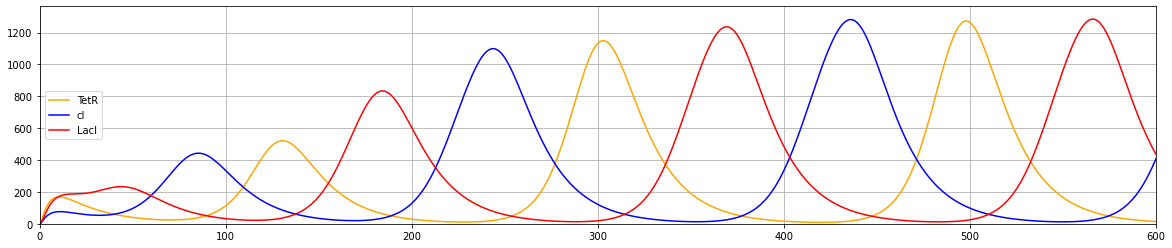

In [66]:
fig_a, ax_a = plt.subplots()

fig_a.set_size_inches(20, 4)



ax_a.plot(df_3.Tiempos, df_3.P3, color='orange', label='TetR')
ax_a.plot(df_3.Tiempos, df_3.P2, color='blue', label='cI')
ax_a.plot(df_3.Tiempos, df_3.P1, color='red', label='LacI')

ax_a.set_xlim(0, tmax)
ax_a.set_ylim(0)
ax_a.grid(True)

plt.legend(loc=6)
# ax_a.set_title('Theoretical Repressilator')

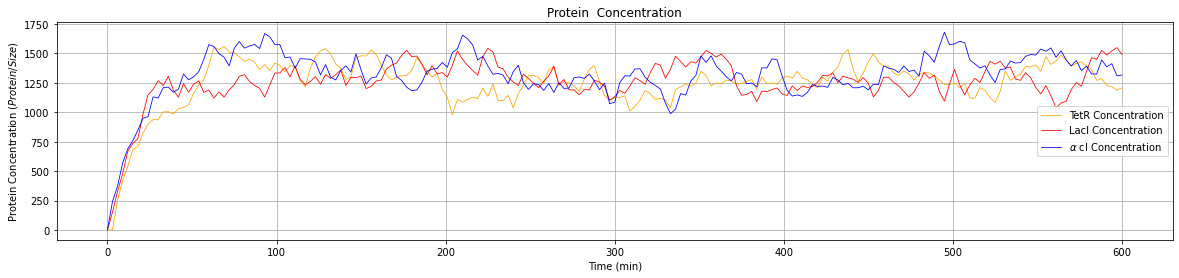

In [58]:
fig_b, ax_b = plt.subplots()

fig_b.set_size_inches(20, 4)

tetR_concentration = (df_2.tetR *2.2)/df_2.cell_size
lacI_concentration = (df_2.lacI *2.2)/df_2.cell_size
alphacl_concentration = (df_2.alphacl) *2.2/df_2.cell_size

ax_b.plot(df_2.time, tetR_concentration, color='orange', label='TetR Concentration', lw=0.8)
ax_b.plot(df_2.time, lacI_concentration, color='red', label='LacI Concentration', lw=0.8)
ax_b.plot(df_2.time, alphacl_concentration, 'blue', label=r'${\alpha}$ cl Concentration', lw=0.8)
ax_b.set_title('Protein  Concentration')
ax_b.set_title('Protein  Concentration')
ax_b.set_xlabel('Time (min)')
ax_b.set_ylabel(r'Protein Concentration (${Protein/Size}$)')
ax_b.grid(True)
ax_b.legend(loc=5)

In [59]:
round(np.log(2)/11.84, 4)

0.0585

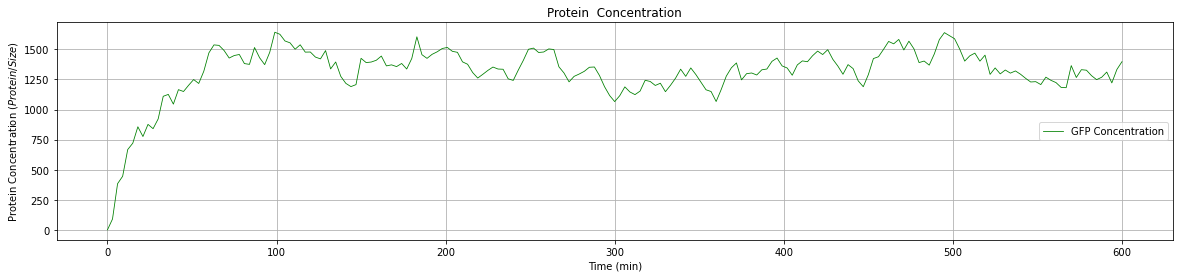

In [60]:
fig_c, ax_c = plt.subplots()

fig_c.set_size_inches(20, 4)

GFP_concentration = (df_2.GFP) *2.2/df_2.cell_size

ax_c.plot(df_2.time, GFP_concentration, color='green', label='GFP Concentration', lw=0.8)
ax_c.set_title('Protein  Concentration')
ax_c.set_title('Protein  Concentration')
ax_c.set_xlabel('Time (min)')
ax_c.set_ylabel(r'Protein Concentration (${Protein/Size}$)')
ax_c.grid(True)
ax_c.legend(loc=5)

In [61]:
np.log(2)/1

0.6931471805599453